![Title](cisco.png)

# Lab - Decision Tree Classification 

## Part 1: Create a Decision Tree Classifier

El conjunto de datos contiene los nombres y los datos demográficos de todos los pasajeros. Además, se incluyen los detalles de viaje de los pasajeros. De estos datos, podemos crear un árbol de decisiones que ilustre los factores que contribuyeron a la supervivencia, o a la falta de ella, en el viaje.

Los conjuntos de datos contienen las siguientes variables:

<table style="undefined;table-layout: fixed; width: 953px">
<colgroup>
<col style="width: 194.2px">
<col style="width: 759.2px">
</colgroup>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1. PassengerID</td>
    <td>Unique identifier for each passenger</td>
  </tr>
  <tr>
    <td>2. Survival</td>
    <td>Did the passenger survive? (0 = No; 1 = Yes)</td>
  </tr>
  <tr>
    <td>3. Pclass</td>
    <td>Passenger ticket class. (1 = 1st; 2 = 2nd; 3 = 3rd)</td>
  </tr>
  <tr>
    <td>4. Name</td>
    <td>Name of the passenger. (last name, first name)</td>
  </tr>
  <tr>
    <td>5. Gender</td>
    <td>Male or female</td>
  </tr>
  <tr>
    <td>6. Age</td>
    <td>Age in years. Mostly integers with float values for children under one year.</td>
  </tr>
  <tr>
    <td>7. SibSp</td>
    <td>Number of siblings or spouse onboard.</td>
  </tr>
  <tr>
    <td>8. Parch</td>
    <td>Number of parents or children onboard.</td>
  </tr>
  <tr>
    <td>9. Ticket</td>
    <td>Ticket number</td>
  </tr>
  <tr>
    <td>10. Fare</td>
    <td>Amount paid for fare in pre-1970 British Pounds</td>
  </tr>
  <tr>
    <td>11. Cabin</td>
    <td>Cabin number</td>
  </tr>
  <tr>
    <td>12. Embarked</td>
    <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
  </tr>
</table>


#### Step 1: Create the dataframe
##### a) Import  pandas and the csv file

In [41]:
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./titanic-train.csv")

##### b) Verify the import and take a look at the data.

In [42]:
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 67.9+ KB


In [43]:
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


#### Step 2: Prepare the Data for the Decision Tree Model.

##### a) Replace string data with numeric labels

Utilizaremos scikit-learn para crear árboles de decisiones. El modelo del árbol de decisiones que utilizaremos solo puede administrar datos numéricos. Los valores para la variable Gender (Género) se deben transformarse en representaciones numéricas. 0 se utilizará para representar el valor "masculino" y 1 para el valor "femenino".

En este código, se utiliza una expresión lambda con el método de estructura de datos `apply()`. Esta expresión lambda representa una característica que utiliza una instrucción condicional para reemplazar los valores de texto de las columnas por el valor numérico correspondiente. La instrucción de la lambda se puede interpretar de la siguiente manera: "Si el parámetro toLabel es ‘male’, colocar 0; si el valor es otro, colocar 1". El método `apply()` ejecutará esta función en los valores de cada fila de la columna "Gender" de la estructura de datos.

In [44]:
training["NewGender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel=='male' else 1)

##### b) Verify that the Gender variable has been changed. 

In [45]:
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewGender
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,0
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S,0
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S,0
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,0
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1


##### c) Address Missing Values in the Dataset
el método `info()` nos indicço que aproximadamente 180 observaciones no tienen el valor de la edad. Este dato es importante para el análisis, así que aunque no es lo ideal podemos rellenar los faltantes con el promedio de edad para el dataset.

In [46]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

##### d) Verify that the values have been replaced.


In [47]:
#verify that the missing values for the age variable have been eliminated.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 13 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            915 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
NewGender      915 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 75.1+ KB


#### Step 3: Train and Score the Decision Tree Model.

##### a) Create an array object with the variable that will be the target for the model. 
El propósito del modelo es clasificar a los pasajeros como sobrevivientes o víctimas. El modelo deducirá qué valores variables de entrada tienen más probabilidad de pertenecer a las víctimas y a los sobrevivientes.

In [55]:
#create the array for the target values
y_target = training["Survived"].values

##### b) Create an array of the values that will be the input for the model. 

Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada y luego creamos un array con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones. Una vez que el modelo esté entrenado, utilizaremos esta variable para asignar estas etiquetas al conjunto de datos de prueba.

In [56]:
columns = ["Fare", "Pclass", "NewGender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

##### c) Create the learned model.

In [57]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

##### d) Evaluate the model 

In [58]:
#Score muestra la precisión del % de las asignaciones
clf_train.score(X_input,y_target)

0.8163934426229508

Este valor de calificación indica que las calificaciones realizadas por el modelo deberían ser correctas aproximadamente el 82 % de las veces.

#### Step 6: Visualize the Tree 
##### a) Create the intermediate file output
`sklearn.externals.six StringIO` se utiliza para generar las características del árbol de decisiones en un archivo.

In [59]:
from sklearn.externals.six import StringIO
with open("./titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

/srv/pl-app/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


##### b) Install Graphviz
Para visualizar el árbol de decisiones, Graphviz debe instalarse desde una terminal. La instalación requiere responder una pregunta emergente, lo cual no se puede hacer desde una celda de código de una libreta de anotaciones. Utilice el comando ```apt-get install graphvi``` de la línea de comando de la terminal para instalar este software.

##### c) Convert the intermediate file to a graphic
El archivo dot que se creó anteriormente se puede convertir en un archivo .png con el procesador dot de Graphiz. Este es un comando shell, así que utilice ```!```` antes de él para ejecutarlo desde esta libreta de anotaciones. El nuevo archivo de imagen titanic.png deberá aparecer en el directorio que contiene esta libreta de anotaciones.

In [60]:
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./titanic.dot -o ./titanic.png

##### d) Display the image 

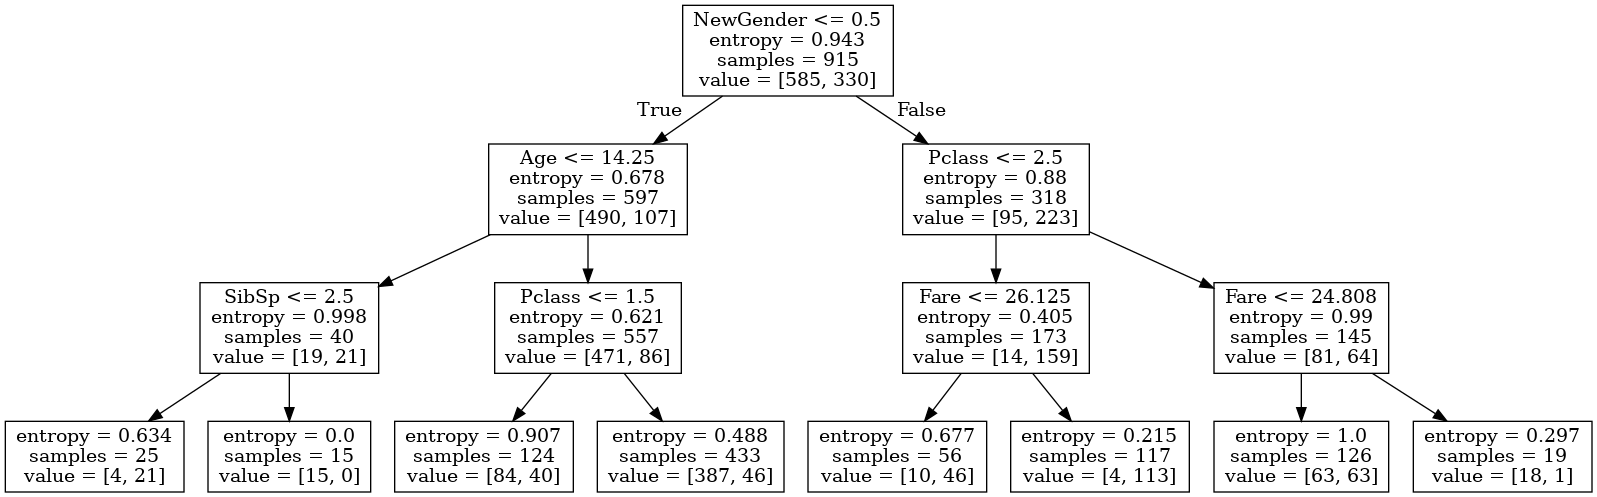

In [61]:
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./titanic.png")

##### e) Interpret the tree
En el árbol entrenado, podemos ver varias cosas. Primero, en su raíz, está la variable Gender, que indica que es el único factor más importante al realizar la clasificación. Las ramas hacia la izquierda son para Gender = 0 o masculino. La raíz y cada nodo intermedio contienen el factor de decisión, la entropía y la muestra de pasajeros que cumplen con criterio en ese punto del árbol. Por ejemplo, el nodo raíz indica que hay 915 observaciones que conforman el conjunto de datos de aprendizaje. En el siguiente nivel, podemos ver que 597 personas eran de género masculino y 318 de género femenino. Para la rama femenina del árbol, en el siguiente nivel hacia abajo, podemos ver que de los 318 pasajeros de género femenino, 173 eran pasajeros de primera o segunda clase (Pclass<=2.5) y 145 eran de tercera clase. Luego, de los 145 pasajeros de género femenino de tercera clase, 126 pagaron una tarifa inferior a 24.8 por su ticket, mientras que 19 pagaron más de ese monto.

Por último, en los nodos de hojas, que están en la fila inferior del árbol, podemos ver valores emparejados entre corchetes que indican el número de víctimas fatales y de sobrevivientes para la clasificación específica de pasajeros. Por ejemplo, para los pasajeros de género femenino de tercera clase que pagaron menos de 24.8, la cantidad de víctimas fatales y sobrevivientes sumaba 63. De esos mismos pasajeros que pagaron más de 24.8, 18 fallecieron y 1 sobrevivió.

La entropía es una medida de ruido en la decisión. El ruido se puede ver como incertidumbre. Por ejemplo, en los nodos en los que la decisión brinda valores iguales en el arreglo de valores de sobrevivientes, la entropía se encuentra en su valor más alto posible, que es 1.0. Esto significa que el modelo no pudo tomar, de forma definitiva, la decisión de clasificación según las variables de entrada. Para los valores de la entropía muy baja, la decisión era mucho más clara, y la diferencia en la cantidad de sobrevivientes y víctimas fatales es mucho mayor.

## Part 2: Apply the Decision Tree Model

usaremos los resultados del modelo del árbol de decisiones programado para etiquetar un conjunto de datos sin etiquetas de pasajeros del Titanic. El árbol de decisiones evaluará las características de cada observación y etiquetará la observación como sobreviviente (etiqueta = 1) o víctima fatal (etiqueta = 0).

#### Step 1: Import and Prepare the Data

##### a) Import the data. 

In [62]:
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./titanic-test.csv")

In [63]:
#Revise los datos (Edad y Cabin tienen datos vacios)
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
PassengerId    393 non-null int64
Survived       393 non-null int64
Pclass         393 non-null int64
Name           393 non-null object
Gender         393 non-null object
Age            307 non-null float64
SibSp          393 non-null int64
Parch          393 non-null int64
Ticket         393 non-null object
Fare           393 non-null float64
Cabin          93 non-null object
Embarked       392 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 29.2+ KB


##### b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for female..

In [64]:
#replace the Gender labels in the testing dataframe
testing["NewGender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

##### c) Replace the missing age values with the mean of the ages.

In [65]:
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

##### d) Verify that the values have been replaced.

In [66]:
#verify the data preparation steps. Enter and run both the info and head 
#methods from here, by entering and running one and then the other.
testing.info()
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
PassengerId    393 non-null int64
Survived       393 non-null int64
Pclass         393 non-null int64
Name           393 non-null object
Gender         393 non-null object
Age            393 non-null float64
SibSp          393 non-null int64
Parch          393 non-null int64
Ticket         393 non-null object
Fare           393 non-null float64
Cabin          93 non-null object
Embarked       392 non-null object
NewGender      393 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 32.3+ KB


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewGender
0,916,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.50,NaN,S,0
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C,1
2,918,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S,0
3,919,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q,1
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S,1


#### Step 2: Label the testing dataset
Aplicará el modelo programado al dataset de prueba.

##### a) Create the array of input variables from the testing data set.

In [67]:
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

##### b) Apply the model to the testing data set.
Utilice el método ```predict()``` del objeto ```clf_train``` que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el array de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [68]:
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


##### c) Evaluate the accuracy of the estimated labels

La realidad sobre la supervivencia de cada pasajero se encuentra en otro archivo llamado `all_data.csv`. Para seleccionar únicamente los pasajeros incluidos en el dataset de prueba, combinamos el dataframe `target_labels` y el dataframe `all_data` del campo `Name`. 

In [69]:
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
print(acc)


0.7588832487309645


## Part 3: Evaluate the Decision Tree Model

La biblioteca de ```sklearn``` incluye un módulo que se puede utilizar para evaluar la precisión del modelo. El método ```train_test_split()``` particionará las observaciones del conjunto de datos completo en dos arrays de observaciones seleccionados de forma aleatoria que conforman los conjuntos de datos de prueba y entrenamiento.
Es recomendable que los dos puntajes sean cercanos, pero la precisión para el conjunto de datos de prueba es, generalmente, más baja que para el conjunto de datos de entrenamiento.

##### Step 1: Import the data

In [70]:
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
Survived    1308 non-null int64
Pclass      1308 non-null int64
Gender      1308 non-null object
Age         1045 non-null float64
SibSp       1308 non-null int64
Fare        1308 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.2+ KB


#### Step 2: Prepare the data.
##### a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [71]:
#replace the Gender labels in the testing dataframe
all_data["NewGender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

##### c) Replace the missing age values with the mean of the age of all members of the data set. 

In [76]:
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare,NewGender
0,1,1,female,29.0000,0,211.3375,1
1,1,1,male,0.9167,1,151.5500,0
2,0,1,female,2.0000,1,151.5500,1
3,0,1,male,30.0000,1,151.5500,0
4,0,1,female,25.0000,1,151.5500,1


In [75]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
Survived     1308 non-null int64
Pclass       1308 non-null int64
Gender       1308 non-null object
Age          1308 non-null float64
SibSp        1308 non-null int64
Fare         1308 non-null float64
NewGender    1308 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 66.5+ KB


#### Step 2: Create the input and output variables for the training and testing data. 
La biblioteca `sklearn` incluye módulos que ayudan con la selección del modelo. Importaremos desde `sklearn.model_selection` el método `train_test_split()`, que dividirá automáticamente el dataset y devolverá un total de cuatro array numpy, dos para las características (prueba y validación) y dos para las etiquetas (prueba y validación). Un parámetro del método especifica la proporción de observaciones que se utilizarán para la prueba y el entrenamiento. Otro parámetro especifica un valor semilla que se utilizará para seleccionar de forma aleatoria la asignación de la observación para la prueba o el entrenamiento. Esto se utiliza para que otro usuario pueda replicar su trabajo al recibir las mismas asignaciones de observaciones para los conjuntos de datos. La sintaxis del método es la siguiente:

<center>```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```</center>
El 40 % de los datos se utilizará para pruebas. El valor semilla aleatorio está configurado en 0.

 ##### a) Designate the input variables and output variables and generate the arrays.

In [86]:
#Import train_test_split() from the sklearn.model_selection libary 
import numpy as np
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

##### b) Train the model and fit it to the testing data.

In [87]:
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

##### c) Compare models by scoring each.

In [88]:
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


El puntaje de precisión de prueba está cerca, pero es menor que el puntaje de los datos de entrenamiento. Esto se debe a que, normalmente, el modelo tiende sobreadaptarse a los datos de entrenamiento y, por lo tanto, el puntaje de prueba representa una mejor evaluación de cómo el modelo puede generalizar fuera de los datos de entrenamiento.

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>
